# **(CNN) for CIFAKE: Real vs. AI-Generated Image Classification**

 In this project, we will build a *Convolutional Neural Network (CNN)* to classify images as either REAL or FAKE. The dataset, CIFAKE, consists of 60,000 real images collected from the CIFAR-10 dataset and 60,000 AI-generated synthetic images created using Stable Diffusion version 1.4. The rapid advancement in AI-generated imagery has raised concerns about authenticity, making it crucial to develop tools that can distinguish between real and synthetic images.

  This project aims to explore whether computer vision techniques, specifically CNNs, can effectively detect AI-generated images. The dataset is split into 100,000 training images (50,000 REAL and 50,000 FAKE) and 20,000 testing images (10,000 REAL and 10,000 FAKE).




**References**

If you use this dataset, you must cite the following sources

Krizhevsky, A., & Hinton, G. (2009). Learning multiple layers of features from tiny images.

Bird, J.J. and Lotfi, A., 2024. CIFAKE: Image Classification and Explainable Identification of AI-Generated Synthetic Images. IEEE Access.

Real images are from Krizhevsky & Hinton (2009), fake images are from Bird & Lotfi (2024). The Bird & Lotfi study is available here.

In [1]:
#download and find the path for the dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("birdy654/cifake-real-and-ai-generated-synthetic-images")

print("Path to dataset files:", path)


100%|██████████| 105M/105M [00:00<00:00, 137MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/versions/3


In [19]:
#imports
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import warnings
warnings.filterwarnings('ignore')

In [11]:
#inspect the data
for root,dir,files in os.walk(path):
  print('dirs' ,dir)
  print('root' ,root)
  print(f'files{len(files)}')

dirs ['train', 'test']
root /root/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/versions/3
files0
dirs ['REAL', 'FAKE']
root /root/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/versions/3/train
files0
dirs []
root /root/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/versions/3/train/REAL
files50000
dirs []
root /root/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/versions/3/train/FAKE
files50000
dirs ['REAL', 'FAKE']
root /root/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/versions/3/test
files0
dirs []
root /root/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/versions/3/test/REAL
files10000
dirs []
root /root/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/versions/3/test/FAKE
files10000


In [14]:
#create the datagenerator and traininng and validation


train_datagen = ImageDataGenerator(
    rescale = 1/255,
    width_shift_range=0.1,         # Randomly shift images horizontally by up to 10%
    height_shift_range=0.1,        # Randomly shift images vertically by up to 10%
    shear_range=0.2,
    horizontal_flip = True,
    rotation_range = 20,
    zoom_range = 0.2,
)

#training and validation data
training = train_datagen.flow_from_directory(
    os.path.join(path, 'train'),
    target_size = (32,32),
    class_mode = "binary",
    shuffle=True,
    seed = 42,
    color_mode = "rgb"

)

validation = train_datagen.flow_from_directory(
    os.path.join(path,'test'),
    target_size = (32,32),
    shuffle=False,
    seed = 42,
    class_mode = "binary",
    color_mode = "rgb"

)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


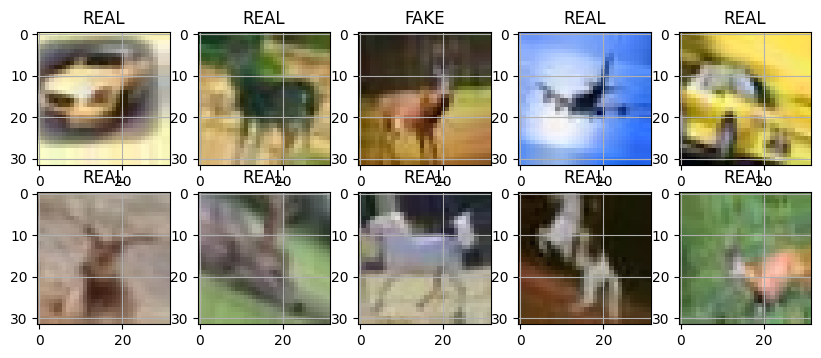

In [16]:
#display the images
images,labels = training.__next__()

class_names = {0: 'FAKE', 1: 'REAL'}

plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.imshow(images[i])
  label = int(labels[i])
  plt.title(class_names[label])
  plt.grid(True)


In [17]:
#model creation
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),  #input
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')             #output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']),
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,089 (941.75 KB)

 Trainable params: 241,089 (941.75 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',    # Track validation accuracy instead of loss
    patience=3,               # Stop after 3 epochs with no improvement
    mode='max',               # Maximize val_accuracy (default is 'min' for loss)
    restore_best_weights=True  # Restore weights from the best val_accuracy epoch
)

model.fit(training, epochs=100, validation_data=validation,batch_size=32, callbacks=[early_stopping])

Epoch 1/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 144s 46ms/step - accuracy: 0.9101 - loss: 0.2260 - val_accuracy: 0.9144 - val_loss: 0.2161
Epoch 2/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 150s 48ms/step - accuracy: 0.9134 - loss: 0.2166 - val_accuracy: 0.8824 - val_loss: 0.2836
Epoch 3/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 150s 48ms/step - accuracy: 0.9108 - loss: 0.2209 - val_accuracy: 0.9144 - val_loss: 0.2093
Epoch 4/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 149s 48ms/step - accuracy: 0.9148 - loss: 0.2145 - val_accuracy: 0.9182 - val_loss: 0.2011
Epoch 5/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 149s 48ms/step - accuracy: 0.9161 - loss: 0.2145 - val_accuracy: 0.9085 - val_loss: 0.2189
Epoch 6/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 153s 49ms/step - accuracy: 0.9170 - loss: 0.2107 - val_accuracy: 0.9155 - val_loss: 0.2182
Epoch 7/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 193s 46ms/step - accuracy: 0.9183 - loss: 0.2109 - val_accuracy: 0.9227 - val_loss: 0.1923
Epoch 8/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 149s 48ms/step - ac

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


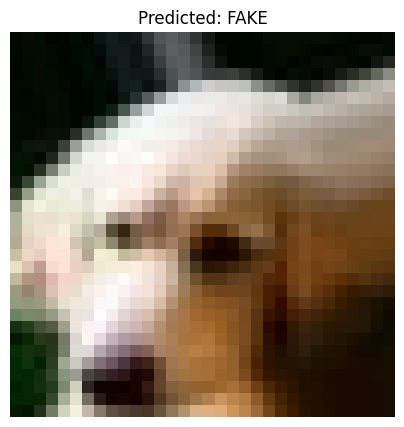

In [35]:


def show_image_by_index(generator, model, index):

    # Get a batch of images and labels
    images, labels = generator.__next__()

    # Ensure index is within the batch size range
    if index >= len(images):
        print(f"Index out of range! Choose between 0 and {len(images)-1}")
        return

    # Get the selected image
    image = images[index]

    # Expand dimensions to match model input (1, height, width, channels)
    img_array = np.expand_dims(image, axis=0)

    # Get the model prediction
    prediction = model.predict(img_array)[0][0]  # Get first value from batch

    # Convert prediction to class (assuming binary classification)
    predicted_class = "REAL" if prediction > 0.5 else "FAKE"

    # Display the image with its predicted class
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis("off")
    plt.show()

# Example usage (assuming `training` is your generator and `model` is trained):
show_image_by_index(validation, model, index=5)  # Change index to see different images


In [36]:
test_loss,test_acc = model.evaluate(validation)
print(f"Test accuracy: {test_acc}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.9194 - loss: 0.2021
Test accuracy: 0.9218500256538391
